In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x=np.random.normal(0,0.2,100)
y=np.random.normal(0.7,0.1,100)
z=np.hstack([x,y])

In [3]:
z2=np.random.normal(0.5,0.1,200)

In [4]:
z3=np.hstack([np.random.normal(-0.5,0.1,100),np.random.normal(-0.2,0.1,100)])

(array([ 4., 14., 26., 29., 15.,  9.,  6., 43., 45.,  9.]),
 array([-0.47814662, -0.33168791, -0.18522921, -0.03877051,  0.1076882 ,
         0.2541469 ,  0.40060561,  0.54706431,  0.69352301,  0.83998172,
         0.98644042]),
 <a list of 10 Patch objects>)

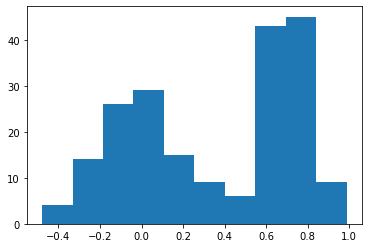

In [5]:
plt.hist(z)

In [6]:
from scipy import stats

In [7]:
kde=stats.gaussian_kde(z)

In [8]:
kde.covariance_factor()

0.3465724215775732

In [9]:
z_g=np.linspace(z.min(),z.max(),1000)

In [10]:
pdf=kde.evaluate(z_g)

(array([0.13655726, 0.47795043, 0.88762222, 0.99004017, 0.51208974,
        0.30725385, 0.2048359 , 1.4679906 , 1.53626923, 0.30725385]),
 array([-0.47814662, -0.33168791, -0.18522921, -0.03877051,  0.1076882 ,
         0.2541469 ,  0.40060561,  0.54706431,  0.69352301,  0.83998172,
         0.98644042]),
 <a list of 10 Patch objects>)

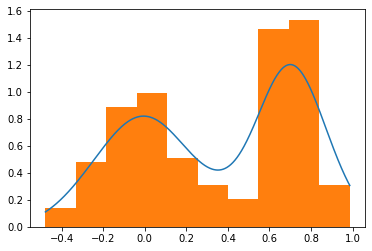

In [11]:
plt.plot(z_g,pdf)
plt.hist(z,density=True)

In [27]:
z_s=(z-z.mean())/(z.std())

1.0


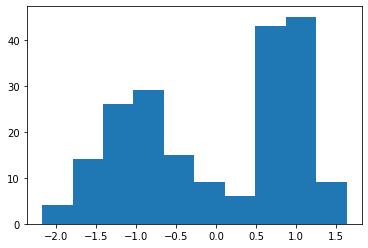

In [30]:
plt.hist(z_s)
print(z_s.std())

In [14]:
kde_s=stats.gaussian_kde(z_s)
kde_s.covariance_factor()

0.3465724215775732

In [15]:
z_gs=np.linspace(z_s.min(),z_s.max(),1000)
pdf_s=kde_s.evaluate(z_gs)

(array([0.05270515, 0.18446803, 0.34258349, 0.38211235, 0.19764432,
        0.11858659, 0.07905773, 0.56658038, 0.59293296, 0.11858659]),
 array([-2.16750815, -1.7880386 , -1.40856906, -1.02909951, -0.64962996,
        -0.27016042,  0.10930913,  0.48877867,  0.86824822,  1.24771777,
         1.62718731]),
 <a list of 10 Patch objects>)

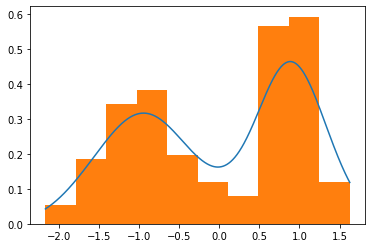

In [16]:
plt.plot(z_gs,pdf_s)
plt.hist(z_s,density=True)

In [17]:
kde_s.covariance_factor()

0.3465724215775732

In [18]:
kde_d=stats.gaussian_kde(z,bw_method=kde_s.covariance_factor())

In [19]:
pdf_d=kde_d.evaluate(z_g)

(array([0.13655726, 0.47795043, 0.88762222, 0.99004017, 0.51208974,
        0.30725385, 0.2048359 , 1.4679906 , 1.53626923, 0.30725385]),
 array([-0.47814662, -0.33168791, -0.18522921, -0.03877051,  0.1076882 ,
         0.2541469 ,  0.40060561,  0.54706431,  0.69352301,  0.83998172,
         0.98644042]),
 <a list of 10 Patch objects>)

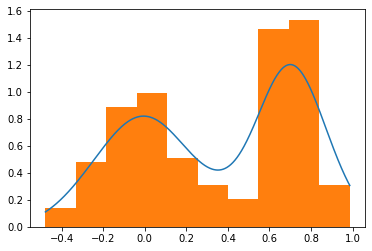

In [20]:
plt.plot(z_g,pdf_d)
plt.hist(z,density=True)

In [21]:
from sklearn.neighbors import KernelDensity

In [31]:
BW_1=0.3465724215775732*z.std()

In [32]:
kde_1d = KernelDensity(bandwidth = BW_1).fit(z[:, None])

In [33]:
pdf_k = np.exp(kde_1d.score_samples(z_g[:, None]))

(array([0.13655726, 0.47795043, 0.88762222, 0.99004017, 0.51208974,
        0.30725385, 0.2048359 , 1.4679906 , 1.53626923, 0.30725385]),
 array([-0.47814662, -0.33168791, -0.18522921, -0.03877051,  0.1076882 ,
         0.2541469 ,  0.40060561,  0.54706431,  0.69352301,  0.83998172,
         0.98644042]),
 <a list of 10 Patch objects>)

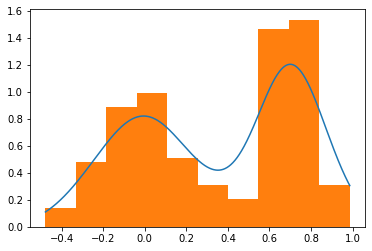

In [34]:
plt.plot(z_g,pdf_k)
plt.hist(z,density=True)

In [26]:
kde_s = KernelDensity(bandwidth = 0.3465).fit(z_s[:, None])
pdf_ks = np.exp(kde_s.score_samples(z_gs[:, None]))

(array([0.05270515, 0.18446803, 0.34258349, 0.38211235, 0.19764432,
        0.11858659, 0.07905773, 0.56658038, 0.59293296, 0.11858659]),
 array([-2.16750815, -1.7880386 , -1.40856906, -1.02909951, -0.64962996,
        -0.27016042,  0.10930913,  0.48877867,  0.86824822,  1.24771777,
         1.62718731]),
 <a list of 10 Patch objects>)

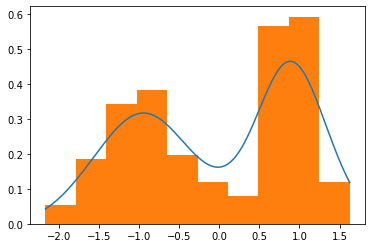

In [35]:
plt.plot(z_gs,pdf_ks)
plt.hist(z_s,density=True)

(array([0.13655726, 0.47795043, 0.88762222, 0.99004017, 0.51208974,
        0.30725385, 0.2048359 , 1.4679906 , 1.53626923, 0.30725385]),
 array([-0.47814662, -0.33168791, -0.18522921, -0.03877051,  0.1076882 ,
         0.2541469 ,  0.40060561,  0.54706431,  0.69352301,  0.83998172,
         0.98644042]),
 <a list of 10 Patch objects>)

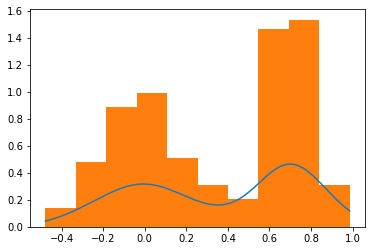

In [36]:
plt.plot(z_g,pdf_ks)
plt.hist(z,density=True)

In [370]:
z_g=np.linspace(z.min(),z.max(),30)
z_g2=np.linspace(z2.min(),z2.max(),50)

In [434]:
z_g3=np.linspace(z3.min(),z3.max(),100)

In [371]:
z_s=(z-z.mean())/(z.std())
z2_s=(z2-z2.mean())/(z2.std())

In [372]:
data_example = np.vstack([z_s, z2_s]).T

In [373]:
kde_example = KernelDensity(bandwidth=0.34).fit(data_example)

In [374]:
z_gs=np.linspace(z_s.min(),z_s.max(),30)
z_gs2=np.linspace(z2_s.min(),z2_s.max(),50)

In [375]:
X, Y = np.meshgrid(z_gs, z_gs2)
xy = np.vstack([X.ravel(), Y.ravel()]).T

In [376]:
data_example.shape

(200, 2)

In [377]:
pdf=np.exp(kde_example.score_samples(xy))

In [382]:
pdf=pdf.reshape(50,30)

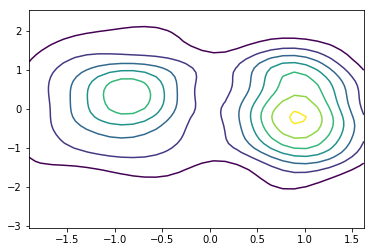

In [383]:
plt.contour(X,Y,pdf)

In [384]:
z_s=(z-z.mean())/(z.std())
z2_s=(z2-z2.mean())/(z2.std())
z3_s=(z3-z3.mean())/(z3.std())

In [385]:
z_gs=np.linspace(z_s.min(),z_s.max(),30)
z_gs2=np.linspace(z2_s.min(),z2_s.max(),50)
z_gs3=np.linspace(z3_s.min(),z3_s.max(),100)

In [386]:
data_example = np.vstack([z_s, z2_s,z3_s]).T

In [387]:
kde_example = KernelDensity(bandwidth=0.34).fit(data_example)

In [388]:
X, Y, Z = np.meshgrid(z_gs, z_gs2,z_gs3)
xyz = np.vstack([X.ravel(), Y.ravel(), Z.ravel()]).T

In [389]:
pdf=np.exp(kde_example.score_samples(xyz))

In [399]:
pdf=pdf.reshape(50,30,100)

In [400]:
Xp, Yp, = np.meshgrid(z_gs, z_gs2)

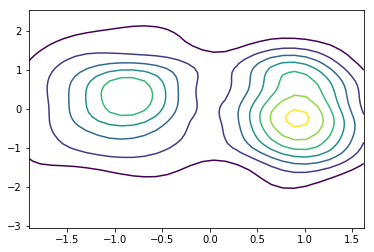

In [402]:
plt.contour(Xp,Yp,pdf.sum(axis=2))

In [403]:
Xo, Yo = np.meshgrid(z_g, z_g2)

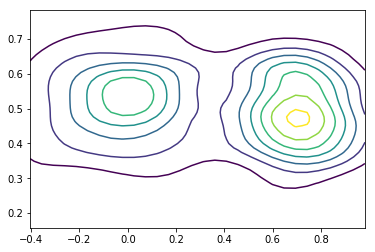

In [404]:
plt.contour(Xo,Yo,pdf.sum(axis=2))

In [405]:
priory = stats.norm.pdf(z_g2,0.55,0.005)

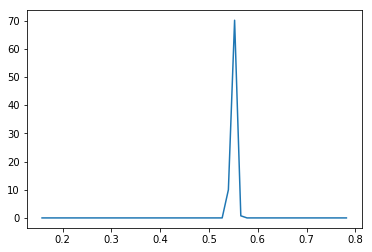

In [406]:
plt.plot(z_g2,priory)

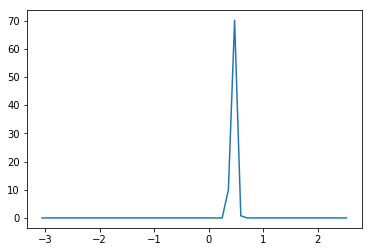

In [407]:
plt.plot(z_gs2,priory)

In [408]:
priorx = stats.norm.pdf(z_g,0.65,0.05)

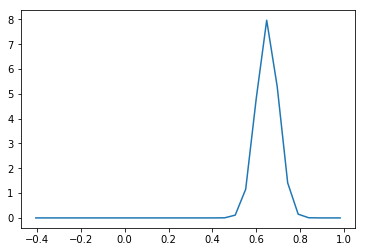

In [409]:
plt.plot(z_g,priorx)

In [412]:
pr2d=((np.ones([50,30]).T*priory).T)*priorx/

In [445]:
norm_pr=(pr2d.sum(axis=0)*(z_gs[1]-z_gs[0])).sum()*(z_gs2[1]-z_gs2[0])

In [446]:
pr2d=pr2d/norm_pr

In [439]:
z_g2=np.linspace(z2.min(),z2.max(),50)

array([1.52167713e-94, 5.57482166e-86, 8.18137910e-78, 4.80960186e-70,
       1.13260587e-62, 1.06840414e-55, 4.03719183e-49, 6.11097183e-43,
       3.70534157e-37, 8.99980891e-32, 8.75639611e-27, 3.41275084e-22,
       5.32808121e-18, 3.33214707e-14, 8.34765627e-11, 8.37706773e-08,
       3.36749196e-05, 5.42260760e-03, 3.49781521e-01, 9.03800583e+00,
       9.35482017e+01, 3.87869242e+02, 6.44202359e+02, 4.28594262e+02,
       1.14224026e+02, 1.21942656e+01, 5.21483901e-01, 8.93332703e-03,
       6.13017160e-05, 1.68507448e-07])

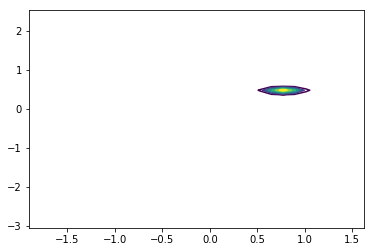

In [447]:
plt.contour(Xp,Yp,pr2d)

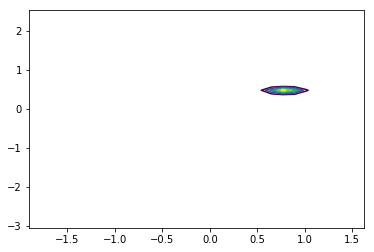

In [448]:
plt.contour(Xp,Yp,pr2d*pdf.sum(axis=2))

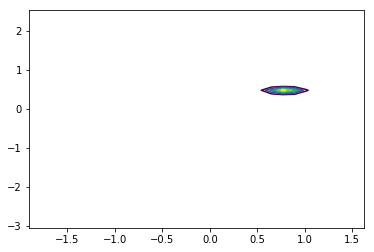

In [449]:
plt.contour(Xp,Yp,((pdf.T*pr2d.T).T).sum(axis=2))

In [450]:
post=(((pdf.T*pr2d.T).T).sum(axis=0)).sum(axis=0)

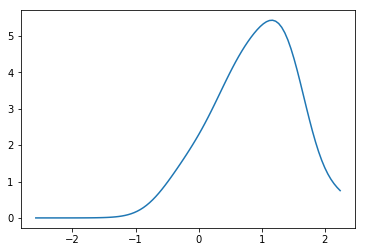

In [451]:
plt.plot(z_gs3,post)

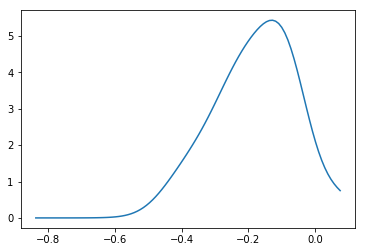

In [452]:
plt.plot(z_g3,post)

In [197]:
prior.sum()*(z_g2[1]-z_g2[0])

1.0000000000000098

In [198]:
pdf*prior

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

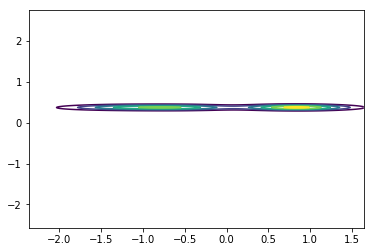

In [206]:
plt.contour(X,Y,(pdf.T*prior).T)

In [201]:
matrix=(pdf.T*prior).T

In [203]:
post=matrix.sum(axis=0)

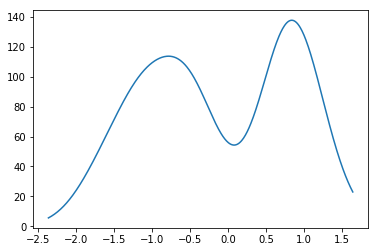

In [209]:
plt.plot(z_gs,post)

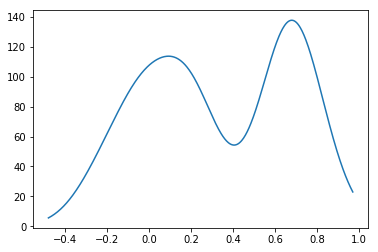

In [211]:
plt.plot(z_g,post)

In [213]:
post.sum()*(z_g[1]-z_g[0])

113.48545904441117